In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore      
import warnings
warnings.filterwarnings('ignore')

In [182]:
df = pd.read_excel(r'C:\Users\Hi\Desktop\train_agriculture.xlsx')
df 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


# Working with Train Dataset for Crop Damage

In [183]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [185]:
print(df['Estimated_Insects_Count'].unique())                                
print(df['Crop_Type'].unique())  
print(df['Soil_Type'].unique())  
print(df['Pesticide_Use_Category'].unique())  
print(df['Number_Doses_Week'].unique())  
print(df['Number_Weeks_Used'].unique())  
print(df['Number_Weeks_Quit'].unique())  
print(df['Season'].unique())  
print(df['Crop_Damage'].unique())  

[ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
[1 0]
[0 1]
[1 3 2]
[ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
[ 0. nan 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35.
 32. 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43.
 50. 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59.
 64. 13.  7.  5. 12.  6.  9. 58. 11. 65.]
[ 0  1  9  4 13  3 14  6  2 12 15 10  8 11  7  5 17 18 16 20 21 19 22 24
 23 27 25 28 26 29 30 31 33 32 36 37 34 39 44 41 35 47 46 40 42 38 43]
[1 2 3]
[0 1 2]


In [186]:
df = df.dropna()                                          # dropping of all NaN values
df = df.reset_index(drop=True)
df 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4152,F00008077,2138,0,1,2,60,47.0,6,3,0
4153,F00008079,2139,0,1,2,30,47.0,2,1,1
4154,F00008080,2267,0,1,2,10,7.0,27,2,0
4155,F00008082,2267,0,1,2,10,20.0,24,2,0


In [187]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [188]:
df=df.drop(['ID'],axis=1)   # ID column dropped as it is only a identification number
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4152,2138,0,1,2,60,47.0,6,3,0
4153,2139,0,1,2,30,47.0,2,1,1
4154,2267,0,1,2,10,7.0,27,2,0
4155,2267,0,1,2,10,20.0,24,2,0


In [189]:
df.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [190]:
collist=df.columns.values
ncol=11
nrows=10 

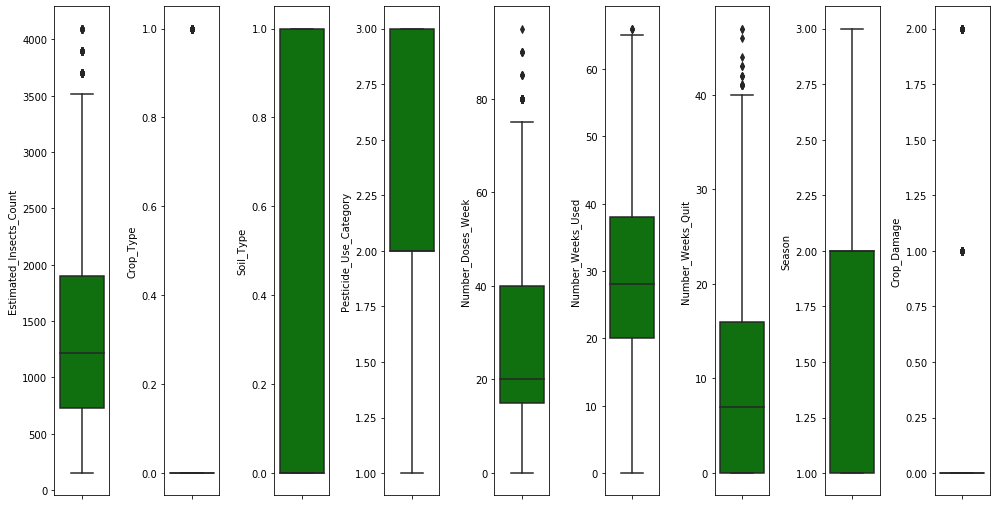

In [191]:
plt.figure(figsize=(17,70))         
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df[collist[i]],color='green',orient='v') 
    plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF1897A988>,
      dtype=object)

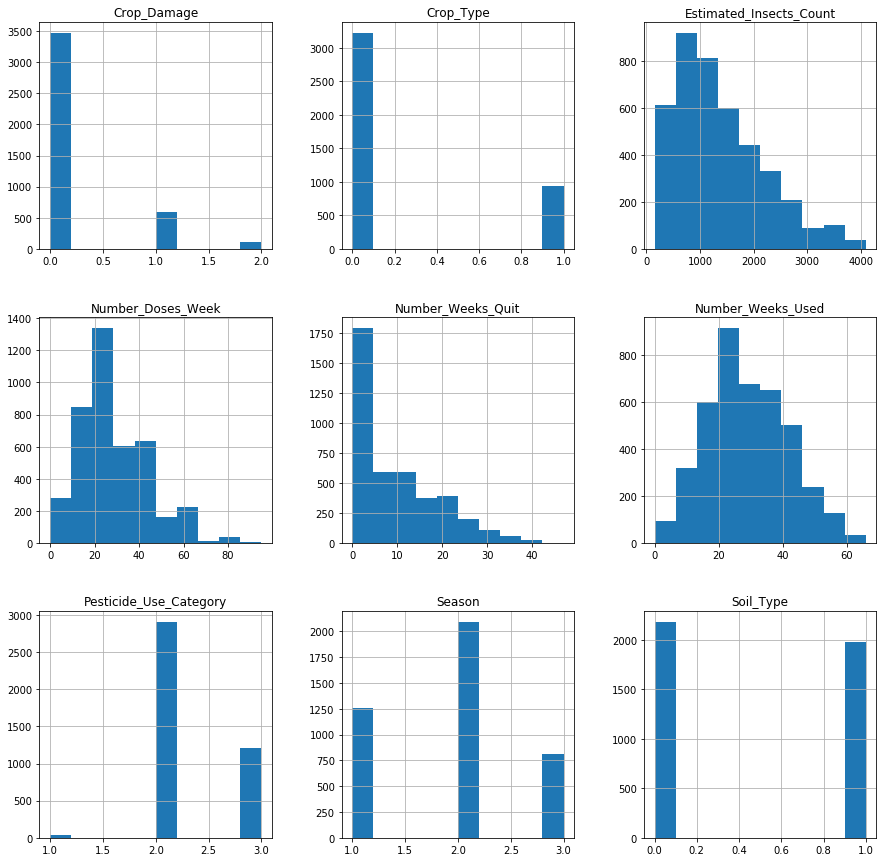

In [192]:
df.hist(figsize=(15,15))   

# Univariate Analysis

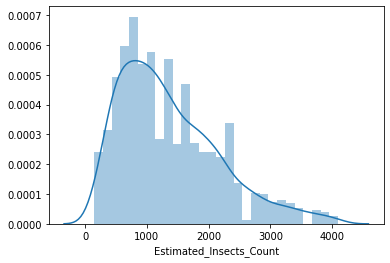

In [193]:
sns.distplot(df['Estimated_Insects_Count']) 

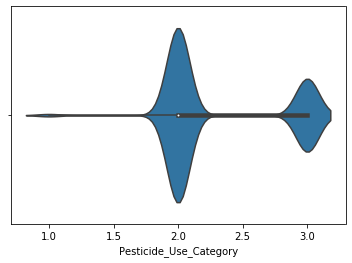

In [194]:
sns.violinplot(df['Pesticide_Use_Category']) 

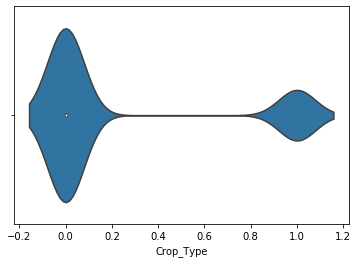

In [195]:
sns.violinplot(df['Crop_Type']) 

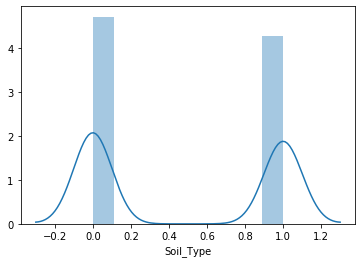

In [196]:
sns.distplot(df['Soil_Type']) 

# Bivariate Analysis with respect to 'Crop_Damage' (i.e. target variable)

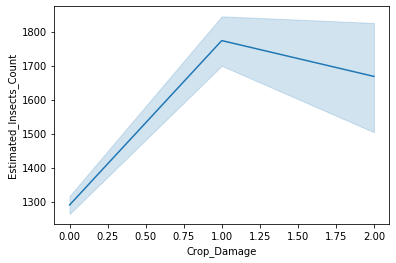

In [197]:
sns.lineplot(x='Crop_Damage', y='Estimated_Insects_Count', data=df) 

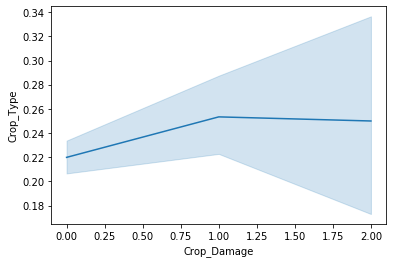

In [198]:
sns.lineplot(x='Crop_Damage', y='Crop_Type', data=df) 

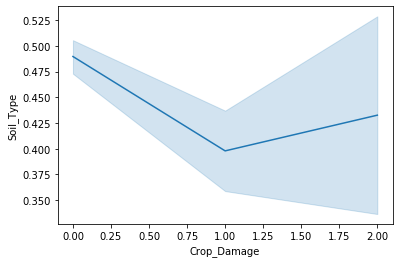

In [199]:
sns.lineplot(x='Crop_Damage', y='Soil_Type', data=df) 

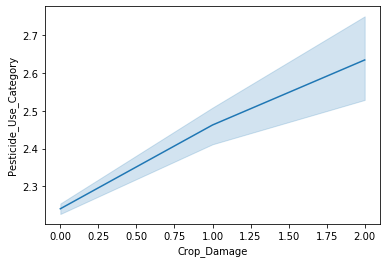

In [200]:
sns.lineplot(x='Crop_Damage', y='Pesticide_Use_Category', data=df) 

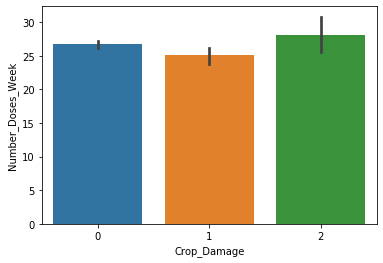

In [201]:
sns.barplot(x='Crop_Damage', y='Number_Doses_Week', data=df)  # 0 - crop Alive, 1 - damaged for other reason, 2 - damaged due to pesticides

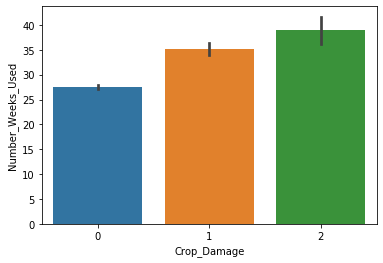

In [202]:
sns.barplot(x='Crop_Damage', y='Number_Weeks_Used', data=df)   # 0 - crop Alive, 1 - damaged for other reason, 2 - damaged due to pesticides

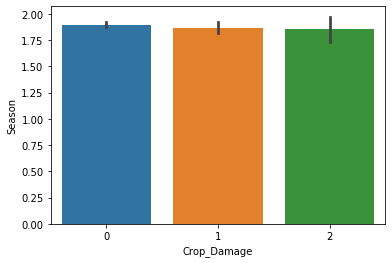

In [203]:
sns.barplot(x='Crop_Damage', y='Season', data=df)  # 0 - crop Alive, 1 - damaged for other reason, 2 - damaged due to pesticides, so wrt season all 3 categories remains same

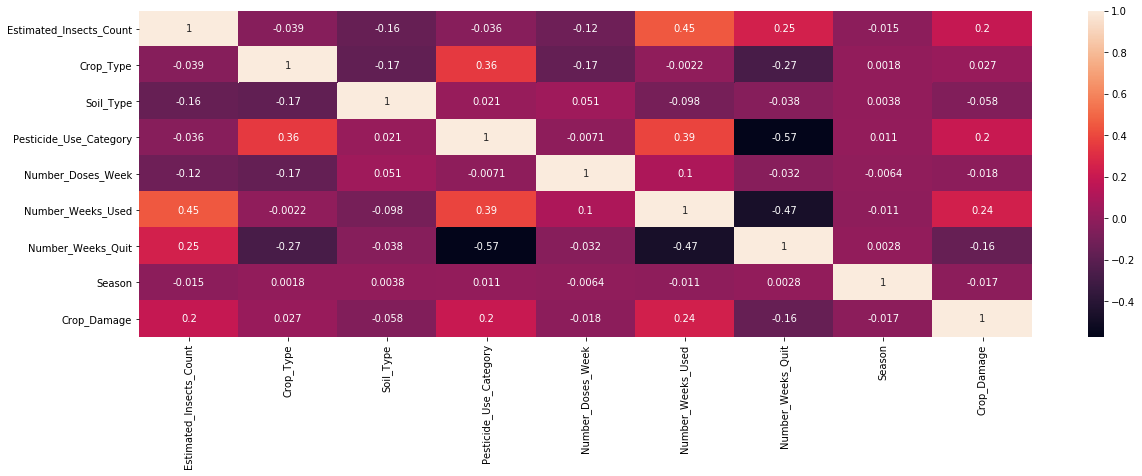

In [204]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True) 

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4157 non-null   int64  
 1   Crop_Type                4157 non-null   int64  
 2   Soil_Type                4157 non-null   int64  
 3   Pesticide_Use_Category   4157 non-null   int64  
 4   Number_Doses_Week        4157 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4157 non-null   int64  
 7   Season                   4157 non-null   int64  
 8   Crop_Damage              4157 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 292.4 KB


In [206]:
df_x=df.drop('Crop_Damage',axis=1)
df_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [207]:
y=pd.DataFrame(df.Crop_Damage)
y.head() 

,Crop_Damage
0,0
1,1
2,1
3,1
4,1


In [208]:
print(df_x.shape)
print(y.shape) 

(4157, 8)
(4157, 1)


In [209]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns)  

In [210]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.447400,1.853780,-0.951844,-2.722511,-1.695155,-2.295764,-0.952940,-1.280074
1,-1.421647,1.853780,-0.951844,-2.722511,-1.695155,-2.295764,-0.952940,0.155004
2,-1.362784,1.853780,-0.951844,-2.722511,-1.695155,-2.295764,-0.952940,0.155004
3,-1.362784,1.853780,1.050593,-2.722511,-1.695155,-2.295764,-0.952940,0.155004
4,-1.258548,1.853780,-0.951844,-2.722511,-1.695155,-2.295764,-0.952940,0.155004
...,...,...,...,...,...,...,...,...
4152,0.943910,-0.539438,1.050593,-0.599157,2.138773,1.438991,-0.337709,1.590081
4153,0.945136,-0.539438,1.050593,-0.599157,0.221809,1.438991,-0.747863,-1.280074
4154,1.102104,-0.539438,1.050593,-0.599157,-1.056167,-1.739524,1.815600,0.155004
4155,1.102104,-0.539438,1.050593,-0.599157,-1.056167,-0.706507,1.507985,0.155004


In [211]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [213]:
# as I got the highest accuracy score with respect to random state 86 in KNeighborsClassifier, so I fix the random state 86 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=86,test_size=0.20)  

In [214]:
print(train_x.shape,test_x.shape)

(3325, 8) (832, 8)


In [215]:
print(train_y.shape,test_y.shape) 

(3325, 1) (832, 1)


In [216]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [217]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.8269230769230769
accuracy score corresponding to random state  43 is 0.8293269230769231
accuracy score corresponding to random state  44 is 0.8317307692307693
accuracy score corresponding to random state  45 is 0.8425480769230769
accuracy score corresponding to random state  46 is 0.8401442307692307
accuracy score corresponding to random state  47 is 0.8389423076923077
accuracy score corresponding to random state  48 is 0.8533653846153846
accuracy score corresponding to random state  49 is 0.8377403846153846
accuracy score corresponding to random state  50 is 0.8377403846153846
accuracy score corresponding to random state  51 is 0.8353365384615384
accuracy score corresponding to random state  52 is 0.8257211538461539
accuracy score corresponding to random state  53 is 0.8473557692307693
accuracy score corresponding to random state  54 is 0.8377403846153846
accuracy score corresponding to random state  55 is 0.8425480769230769
accura

In [218]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - KNeighborsClassifier



Accuracy_score =  0.8557692307692307


Cross_Val_Score =  0.7941056533827618


classification_report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       717
           1       0.39      0.20      0.26        91
           2       0.00      0.00      0.00        24

    accuracy                           0.86       832
   macro avg       0.42      0.39      0.40       832
weighted avg       0.80      0.86      0.82       832



confusion matrix
 [[694  23   0]
 [ 73  18   0]
 [ 19   5   0]]




In [219]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - SupportVectorClassifier



Accuracy_score=  0.8641826923076923


Cross_Val_Score =  0.7861683271547729


classification_report
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       717
           1       0.47      0.21      0.29        91
           2       0.00      0.00      0.00        24

    accuracy                           0.86       832
   macro avg       0.45      0.40      0.41       832
weighted avg       0.81      0.86      0.83       832



confusion matrix
 [[700  16   1]
 [ 72  19   0]
 [ 19   5   0]]




In [220]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - DecisionTreeClassifier



Accuracy_score=  0.75


Cross_Val_Score =  0.6803394346617238


classification_report
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       717
           1       0.23      0.41      0.29        91
           2       0.05      0.04      0.04        24

    accuracy                           0.75       832
   macro avg       0.39      0.42      0.40       832
weighted avg       0.81      0.75      0.77       832



confusion matrix
 [[586 117  14]
 [ 48  37   6]
 [ 14   9   1]]




In [221]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - RandomForestClassifier



Accuracy_score=  0.8521634615384616


Cross_Val_Score =  0.777508109360519


classification_report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       717
           1       0.40      0.25      0.31        91
           2       0.50      0.04      0.08        24

    accuracy                           0.85       832
   macro avg       0.60      0.42      0.44       832
weighted avg       0.82      0.85      0.83       832



confusion matrix
 [[685  31   1]
 [ 68  23   0]
 [ 20   3   1]]




In [222]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - GradientBoostingClassifier



Accuracy_score=  0.8665865384615384


Cross_Val_Score =  0.8349733549582947


classification_report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       717
           1       1.00      0.04      0.08        91
           2       0.00      0.00      0.00        24

    accuracy                           0.87       832
   macro avg       0.62      0.35      0.34       832
weighted avg       0.86      0.87      0.81       832



confusion matrix
 [[717   0   0]
 [ 87   4   0]
 [ 24   0   0]]




In [223]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - AdaBoost Classifier



Accuracy_score=  0.7572115384615384


Cross_Val_Score =  0.680812094531974


classification_report
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       717
           1       0.23      0.36      0.28        91
           2       0.07      0.08      0.08        24

    accuracy                           0.76       832
   macro avg       0.40      0.43      0.41       832
weighted avg       0.81      0.76      0.78       832



confusion matrix
 [[595 104  18]
 [ 49  33   9]
 [ 13   9   2]]




In [224]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - XGBoost Classifier



Accuracy_score=  0.8377403846153846


Cross_Val_Score =  0.7683636468952735


classification_report
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       717
           1       0.34      0.30      0.32        91
           2       0.00      0.00      0.00        24

    accuracy                           0.84       832
   macro avg       0.41      0.41      0.41       832
weighted avg       0.81      0.84      0.82       832



confusion matrix
 [[670  44   3]
 [ 63  27   1]
 [ 15   9   0]]




In [225]:
# Here GradientBoostingClassifier is working best with an Accuracy Score of 0.8665865384615384 so I am saving the Model
from sklearn.externals import joblib
joblib.dump(gbc, 'GradientBoostingClassifier_Crop_Damage.pkl')  

['GradientBoostingClassifier_Crop_Damage.pkl']

# Working with Test Dataset for Crop Damage

In [226]:
df1 = pd.read_excel(r'C:\Users\Hi\Desktop\test_agriculture.xlsx')
df1 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [227]:
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [228]:
df1 = df1.dropna()                                          # dropping of all NaN values
df1 = df1.reset_index(drop=True)
df1 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000007,410,1,1,1,0,0.0,0,2
1,F00000011,626,1,0,1,0,0.0,0,2
2,F00000013,731,1,0,1,0,0.0,0,2
3,F00000014,789,0,0,1,0,0.0,0,1
4,F00000015,851,0,1,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...
1075,F00003130,1132,0,1,2,60,14.0,23,2
1076,F00003133,1132,0,1,2,40,34.0,7,3
1077,F00003135,1132,0,1,2,40,25.0,3,1
1078,F00003138,1132,0,1,2,20,13.0,23,1


In [229]:
df1.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [230]:
df1=df1.drop(['ID'],axis=1)   # ID column dropped as it is only a identification number
df1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,410,1,1,1,0,0.0,0,2
1,626,1,0,1,0,0.0,0,2
2,731,1,0,1,0,0.0,0,2
3,789,0,0,1,0,0.0,0,1
4,851,0,1,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
1075,1132,0,1,2,60,14.0,23,2
1076,1132,0,1,2,40,34.0,7,3
1077,1132,0,1,2,40,25.0,3,1
1078,1132,0,1,2,20,13.0,23,1


In [231]:
collist=df1.columns.values
ncol=11
nrows=10 

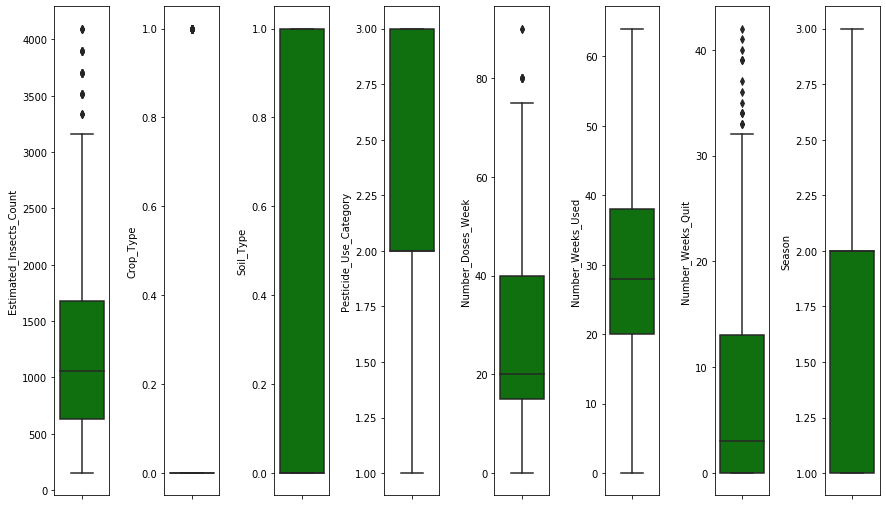

In [232]:
plt.figure(figsize=(17,70))         
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='green',orient='v') 
    plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF1A4B6648>,
      dtype=object)

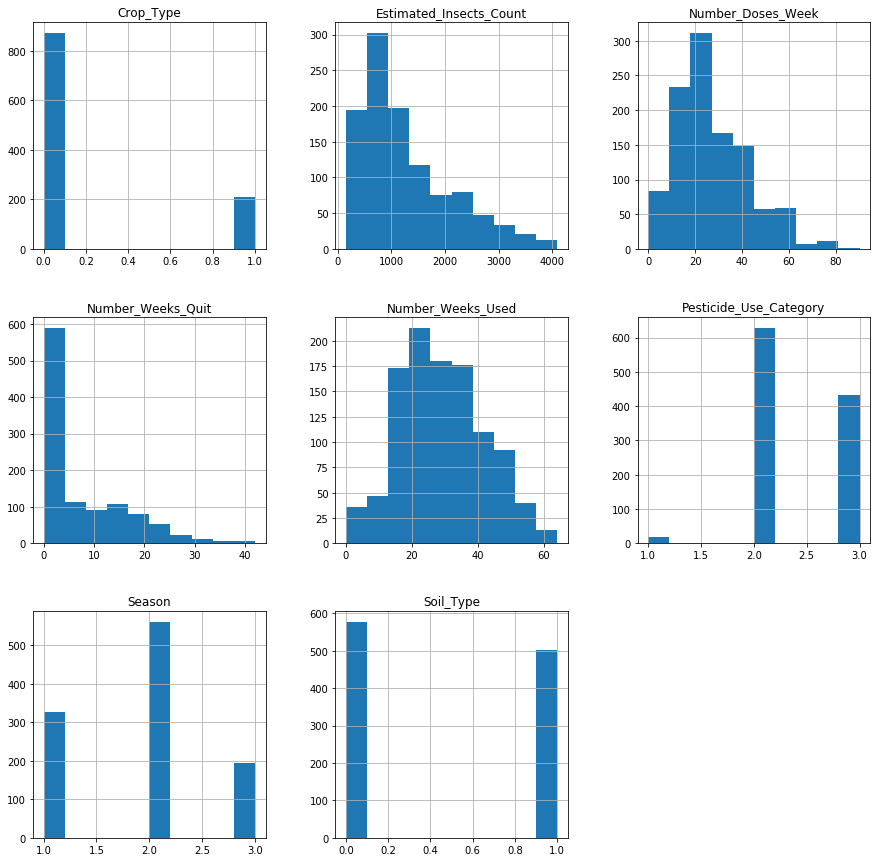

In [233]:
df1.hist(figsize=(15,15))   

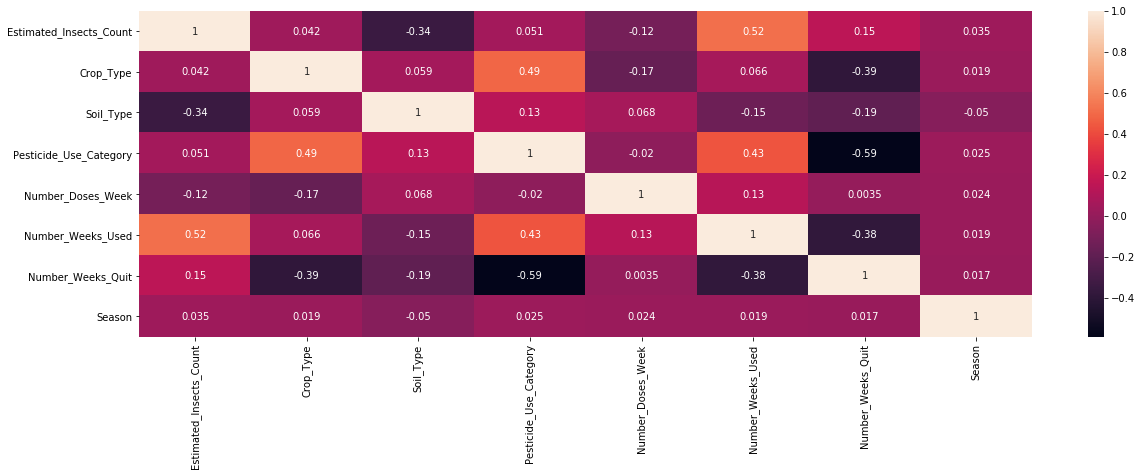

In [234]:
plt.figure(figsize=(20,6))
sns.heatmap(df1.corr(),annot=True) 

# Univariate Analysis

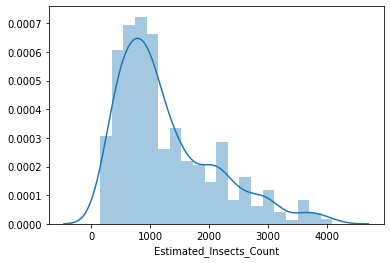

In [235]:
sns.distplot(df1['Estimated_Insects_Count']) 

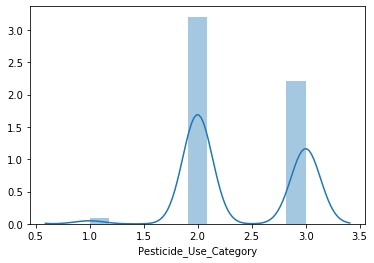

In [236]:
sns.distplot(df1['Pesticide_Use_Category']) 

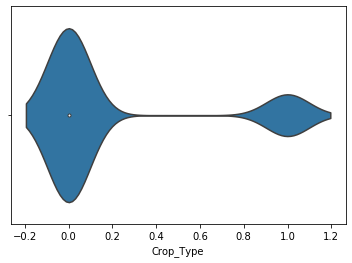

In [237]:
sns.violinplot(df1['Crop_Type']) 

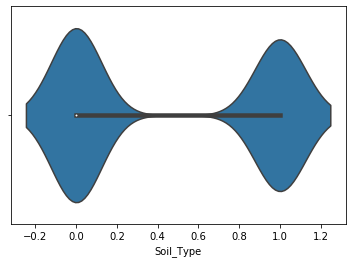

In [238]:
sns.violinplot(df1['Soil_Type']) 

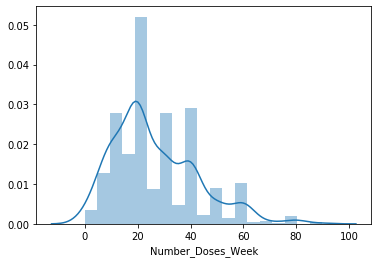

In [239]:
sns.distplot(df1['Number_Doses_Week']) 

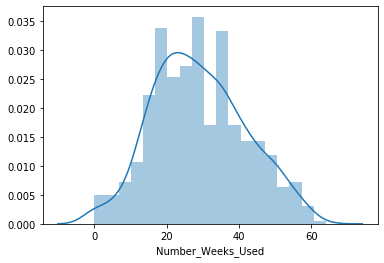

In [240]:
sns.distplot(df1['Number_Weeks_Used']) 

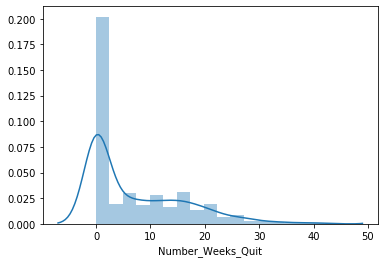

In [241]:
sns.distplot(df1['Number_Weeks_Quit']) 

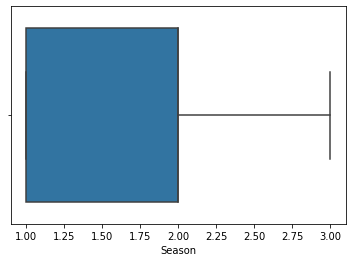

In [242]:
sns.boxplot(df1['Season']) 

In [243]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1080 non-null   int64  
 1   Crop_Type                1080 non-null   int64  
 2   Soil_Type                1080 non-null   int64  
 3   Pesticide_Use_Category   1080 non-null   int64  
 4   Number_Doses_Week        1080 non-null   int64  
 5   Number_Weeks_Used        1080 non-null   float64
 6   Number_Weeks_Quit        1080 non-null   int64  
 7   Season                   1080 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 67.6 KB


In [244]:
df_x1=df1
df_x1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,410,1,1,1,0,0.0,0,2
1,626,1,0,1,0,0.0,0,2
2,731,1,0,1,0,0.0,0,2
3,789,0,0,1,0,0.0,0,1
4,851,0,1,1,0,0.0,0,2


In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(df_x1) 
x1 = pd.DataFrame(x1,columns=df_x1.columns)  
x1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.029392,2.041437,1.071036,-2.664317,-1.639476,-2.272461,-0.798290,0.178939
1,-0.772200,2.041437,-0.933676,-2.664317,-1.639476,-2.272461,-0.798290,0.178939
2,-0.647177,2.041437,-0.933676,-2.664317,-1.639476,-2.272461,-0.798290,0.178939
3,-0.578116,-0.489851,-0.933676,-2.664317,-1.639476,-2.272461,-0.798290,-1.285105
4,-0.504293,-0.489851,1.071036,-2.664317,-1.639476,-2.272461,-0.798290,0.178939
...,...,...,...,...,...,...,...,...
1075,-0.169706,-0.489851,1.071036,-0.739593,2.086214,-1.176670,1.788733,0.178939
1076,-0.169706,-0.489851,1.071036,-0.739593,0.844317,0.388745,-0.010935,1.642982
1077,-0.169706,-0.489851,1.071036,-0.739593,0.844317,-0.315692,-0.460853,-1.285105
1078,-0.169706,-0.489851,1.071036,-0.739593,-0.397579,-1.254941,1.788733,-1.285105


In [246]:
# Using The best working Model - GradientBoostingClassifier for Crop_Damage prediction in Test Dataset and the output is the Prediction 
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
pre1=gbc.predict(x1)
print(pre1)



Model name - GradientBoostingClassifier



[0 0 1 ... 0 0 0]
